In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
! git clone https://github.com/calico/basenji.git

Cloning into 'basenji'...
remote: Enumerating objects: 9982, done.
remote: Counting objects: 100% (3135/3135), done.
remote: Compressing objects: 100% (1404/1404), done.
remote: Total 9982 (delta 1757), reused 1739 (delta 1731), pack-reused 6847
Receiving objects: 100% (9982/9982), 156.55 MiB | 30.02 MiB/s, done.
Resolving deltas: 100% (7253/7253), done.


In [4]:
! mv ./basenji ./gdrive/MyDrive/


In [4]:
import os
os.chdir('/content/gdrive/MyDrive/basenji/')

In [5]:
!pip install -q condacolab
import condacolab
condacolab.install()

!conda --version
!conda config --env --add channels conda-forge
!conda config --env --add channels bioconda
!conda config --env --add channels defaults

! conda update -n base -c conda-forge conda

✨🍰✨ Everything looks OK!
conda 23.11.0
Channels:
 - conda-forge
 - defaults
 - bioconda
Platform: linux-64
Solving environment: | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.4.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



In [6]:
os.chdir('/content/gdrive/MyDrive/basenji/')
!conda install --yes --file requirements.txt

Channels:
 - defaults
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.4.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - astropy
    - cooler
    - cooltools
    - h5py
    - intervaltree
    - joblib
    - matplotlib
    - natsort
    - networkx
    - numpy
    - pandas
    - pillow
    - pybedtools
    - pybigwig
    - pysam
    - qnorm
    - scikit-learn
    - scipy
    - seaborn
    - statsmodels
    - tabulate


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arrow-cpp-11.0.0           |  ha770c72_58_cpu          38 KB  conda-forge
    asciitree-0.3.3            |             py_2          10 KB


In [7]:
! conda install tensorflow==2.8.0
! conda install tensorflow-io-gcs-filesystem==0.25.0

Channels:
 - defaults
 - bioconda
 - conda-forge
Platform: linux-64
Solving environment: - \ | / warning  libmamba Added empty dependency for problem type SOLVER_RULE_UPDATE
- \ | / - \ | / - \ | / - \ | / - \ | / - failed

LibMambaUnsatisfiableError: Encountered problems while solving:
  - nothing provides __cuda needed by tensorflow-2.8.0-cuda102py310hcf4adbc_0

Could not solve for environment specs
The following packages are incompatible
├─ mamba >=1.5.5  is installable with the potential options
│  ├─ mamba [1.5.5|1.5.6|1.5.7|1.5.8] would require
│  │  └─ libmambapy [1.5.5 py310h39ff949_0|1.5.6 py310h39ff949_0|1.5.7 py310h39ff949_0|1.5.8 py310h39ff949_0], which requires
│  │     └─ libmamba [1.5.5 had39da4_0|1.5.6 had39da4_0|1.5.7 had39da4_0|1.5.8 had39da4_0], which requires
│  │        └─ libarchive >=3.7.2,<3.8.0a0  with the potential options
│  │           ├─ libarchive 3.7.2 would require
│  │           │  └─ libxml2 [>=2.12.2,<

In [8]:
! python setup.py develop --no-deps

running develop
/usr/local/lib/python3.10/site-packages/setuptools/command/develop.py:40: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://github.com/pypa/setuptools/issues/917 for details.
        ********************************************************************************

!!
  easy_install.initialize_options(self)
/usr/local/lib/python3.10/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog

In [9]:
 ! export BASENJIDIR=~/code/Basenji
 ! export PATH=$BASENJIDIR/bin:$PATH
 ! export PYTHONPATH=$BASENJIDIR/bin:$PYTHONPATH

In [10]:
import json
import os
import shutil
import subprocess

In [12]:
import basenji

In [15]:
import pandas as pd

In [17]:
pd.read_csv('/content/bounds_data.csv')

,Unnamed: 0,start,end
0,HiC_scaffold_1,11978,8978824
1,HiC_scaffold_2,1,8432348
2,HiC_scaffold_3,3747,8591505
3,HiC_scaffold_4,1048,8678119
4,HiC_scaffold_5,1346,9217964
5,HiC_scaffold_6,4087,10506237
6,HiC_scaffold_7,1620,12451479
7,HiC_scaffold_8,3732,9093404
8,HiC_scaffold_9,225,9059063
9,HiC_scaffold_10,1000,9916281


In [18]:
! mv /content/bounds_data.csv /content/gdrive/MyDrive

### Now we can import the model and specify the parameters

In [20]:
import os
import json
import subprocess
os.environ["CUDA_VISIBLE_DEVICES"] = '-1' ### run on CPU

from cooltools.lib.numutils import set_diag
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysam
import tensorflow as tf

from basenji import dataset, dna_io, seqnn

In [21]:
model_dir = '/content/gdrive/MyDrive/basenji/manuscripts/akita/'
params_file = model_dir+'params.json'
model_file  = model_dir+'model_best.h5'
with open(params_file) as params_open:
    params = json.load(params_open)
    params_model = params['model']
    params_train = params['train']

seqnn_model = seqnn.SeqNN(params_model)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sequence (InputLayer)       [(None, 1048576, 4)]         0         []                            
                                                                                                  
 stochastic_reverse_complem  ((None, 1048576, 4),         0         ['sequence[0][0]']            
 ent (StochasticReverseComp   ())                                                                 
 lement)                                                                                          
                                                                                                  
 stochastic_shift (Stochast  (None, 1048576, 4)           0         ['stochastic_reverse_complemen
 icShift)                                                           t[0][0]']               

### Now it's time to import fasta and specify borders

In [22]:
fasta_open = pysam.Fastafile('/content/gdrive/MyDrive/masurca235_21chr_mtx.fasta')

In [38]:
chrm , end, start = 'HiC_scaffold_2', 6000000, 6000000 - 2**20

In [39]:
seq = fasta_open.fetch(chrm, start, end).upper()

In [40]:
seq_1hot = dna_io.dna_1hot(seq)

In [41]:
test_pred_from_seq = seqnn_model.model.predict(np.expand_dims(seq_1hot,0))

1/1 [==============================] - 6s 6s/step


### Let's make a matrix of size: (448,448)

In [42]:
test_pred_from_seq.shape

(1, 99681, 5)

In [43]:
def from_upper_triu(vector_repr, matrix_len, num_diags):
    z = np.zeros((matrix_len,matrix_len))
    triu_tup = np.triu_indices(matrix_len,num_diags)
    z[triu_tup] = vector_repr
    for i in range(-num_diags+1,num_diags):
        set_diag(z, np.nan, i)
    return z + z.T

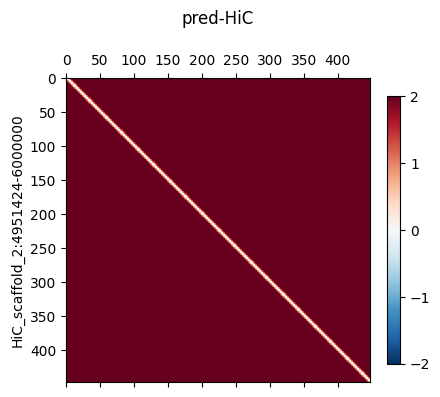

In [54]:
plt.figure(figsize=(8,4))
target_index = 0
target_length1_cropped = 448
hic_diags = 2
vmin=-2; vmax=2

mat = from_upper_triu(test_pred_from_seq[:,:,target_index], target_length1_cropped, hic_diags)

plt.subplot(121)
im = plt.matshow(mat, fignum=False, cmap= 'RdBu_r', vmax=vmax, vmin=vmin)
plt.colorbar(im, fraction=.04, pad = 0.05, ticks=[-2,-1, 0, 1,2]);
plt.title('pred-HiC',y=1.15 )
plt.ylabel(str(chrm) + ':' +  str(start) + '-' + str(end))

plt.tight_layout()
plt.show()